Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.02 Sampling Rate and Aliasing</font>
# <font color=red>TUTORIAL</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd
from sympy import Symbol, sin, series
from sympy import roots, solve_poly_system
import scipy.special

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b",linewidth = 1): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

## <font color=red>DSP.02.T1) Nyquist Frequency in the Spatial Domain</font>

### <font color=red>DSP.02.T1.a) Nyquist Theorem - Spatial Data</font>

Just as the Nyquist-Shannon Sampling Theorem (Nyquist Theorem for short) reigns supreme in the temporal domain, it applies equally well in the distance/spatial domain.

Look at this spatial pattern.

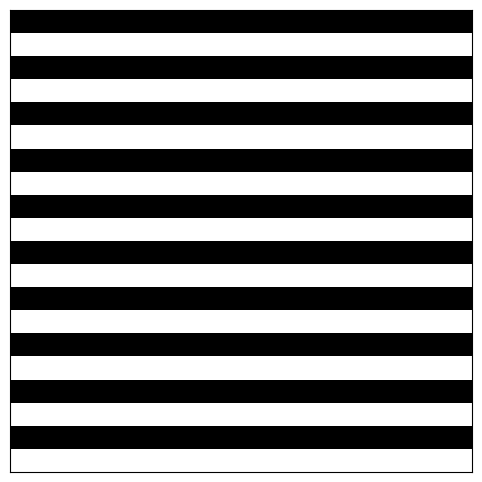

In [2]:
X = 255 * np.ones((100,100))
for r in range(10):
    X[r*10:r*10+5,:] = 0
    
make_imshow(X)
plt.show()     

The horizontal lines alternate between black and white 10 times. Assuming that the unit of distance is 1 meter, with 1 vertical meter displayed, that
is a spatial frequency of 10 cycles per meter.

Note that there is information in this image going top to bottom but not going side to side - in a given
row, nothing changes when moving left to right. Things change only when going top to bottom. To
represent this spatial image (from top to bottom), how often do we need to obtain a sample?

Answer:
    
What we discussed in the Lesson 2 Basics unit, when we were talking about sampling a timeseries, applies in space as well: the Nyquist Theorem states that, for a series to represent a continuous pattern
adequately, the sample rate must be at least twice the fastest frequency present. This requirement follows from the fact that only if samples are obtained at least twice per cycle can a discrete series
accurately represent the frequency of a sine wave in the original phenomenon. This axiom is referred to
as Nyquist's Rule, and one-half the sampling frequency is referred to as the Nyquist Frequency.

(Recall our discussion in the Lesson 2 Basics unit that sampling exactly twice the frequency is often very problematic. In almost all cases, you should sample more than twice as fast, and we noted that 5-10x as fast is a common guideline.)

The plot above has a vertical spatial frequency of 10 cycles per meter. Thus, according to the Nyquist
Rule, we need to sample ≥ 20 times per meter.

Consider the case where samples are obtained 33 times per meter.

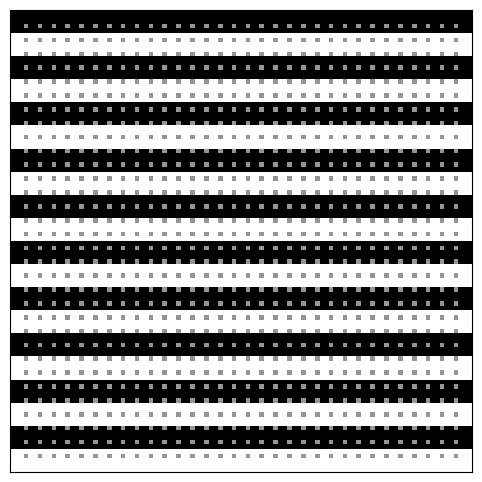

In [3]:
X[3:99:3,3:99:3] = 127

make_imshow(X)
plt.show()  

The grey squares show where each data point is obtained when collecting 33 equally-spaced samples
in horizontal and vertical directions.

Look at the sampled image (the sampled values used to create a new image)

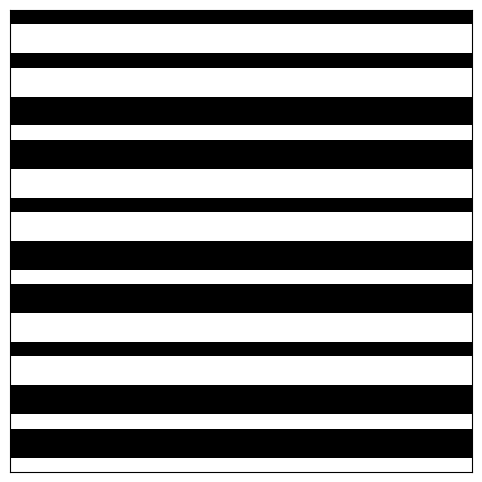

In [4]:
X = 255 * np.ones((100,100))
for r in range(10):
    X[r*10:r*10+5,:] = 0
X = X[3:99:3,3:99:3]

make_imshow(X)
plt.show() 

The original spatial image is composed of 100 values in 1 meter in the horizontal and vertical direction. The above code samples the image at
every 3rd point (i.e., 33 Hz) in the horizontal and vertical direction to produce the below image.

Although this image appears slightly distorted compared to the original, the frequency of the spatial
pattern is not distorted, because Nyquist's Rule was not violated. As we noted in the Lesson 2 Basics unit, you may want to
sample much faster than the minimum specified by the Nyquist Theorem if you want the sampled
representation to look better. But even here there are still 10 black bars.

We noted in the Lesson 2 Basics unit, talking about sampling a continuous timeseries, any phenomenon that can be sampled and recorded repeatedly over time can be
treated as a vector of observations of the form: $X_{t}$ , $X_{t-d}$, $X_{t-2d}$, $X_{t-3d}$, ,...., $X_{t-nd}$.
    
In the present example, the values are recorded over space instead of time. These data are sometimes called a spatial series
(parallel to a timeseries), but let's still use the 't' subscript for consistency. The subscripts refer to the location at which the variable X is observed, with t
the location at which recording began and d the sampling period (the distance between adjacent
samples, a constant in most applications, and assumed constant in the present discussion). Whereas
for a timeseries t and d refer to time (such as seconds or milliseconds), for a spatial series they refer to
distance, such as meters or millimeters.

### <font color=red>DSP.02.T1.b) Nyquist Theorem - Spatial Data</font>

Here is an instance in which Nyquist's Rule is violated, with samples of the same 10 Hz spatial frequency are obtained using
a sampling rate of 14 samples per meter. You may note that 14 is greater than 10 but not greater than 2*10.

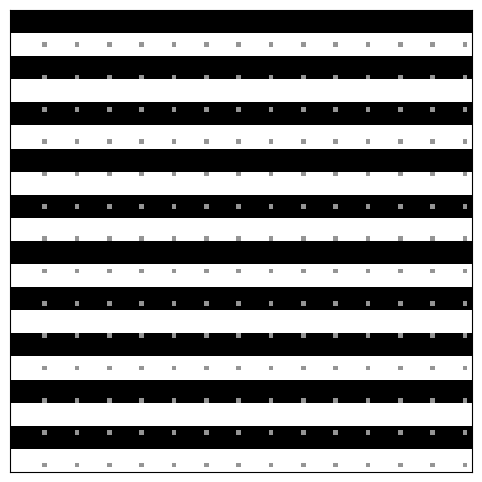

In [5]:
X = 255 * np.ones((100,100))
for r in range(10):
    X[r*10:r*10+5,:] = 0
X[7:99:7,7:99:7] = 127

make_imshow(X)
plt.show()  

The grey squares show where each data point is obtained when collecting 14 equally-spaced samples
in the horizontal and vertical direction.

Look at the sampled image (the sampled values are used to create a new image).

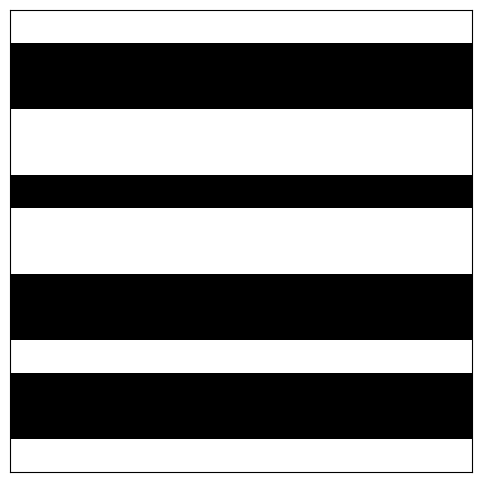

In [6]:
X = 255 * np.ones((100,100))
for r in range(10):
    X[r*10:r*10+5,:] = 0
X = X[7:99:7,7:99:7]

make_imshow(X)
plt.show() 

This image is distorted compared to the original. Importantly for present purposes, the spatial frequency
is also distorted.

The spatial frequency is 4 cycles per meter. Could we have predicted this aliased spatial frequency in
advance?

Answer:
    
Sure. The original image has a spatial frequency of 10 cycles per meter. To represent this spatial pattern accurately,
the sample rate must be more than twice the fastest frequency present in the original waveform.
If we sample at 14 points per meter, we are below the 2 × 10 = 20 sampling rate required by Nyquist's
Rule.

When sampling at 14 points per meter, the 10 cycles per meter signal has been aliased down to 4 cycles
per meter, because 4 and 10 are equidistant from the Nyquist frequency of 14/2 = 7 cycles per meter.

### <font color=red>DSP.02.T1.c) Nyquist Theorem - Spatial Data</font>

Consider the case where we obtain 8 samples per meter.

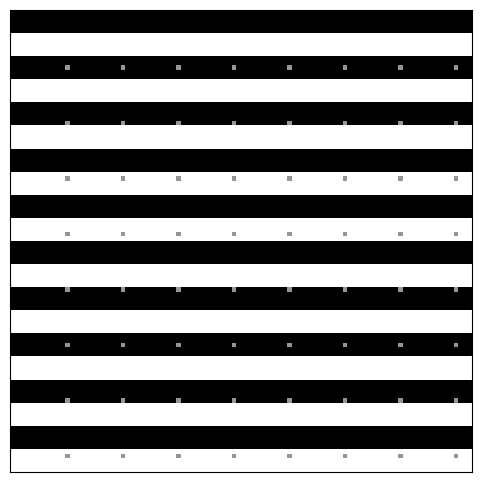

In [7]:
X = 255 * np.ones((100,100))
for r in range(10):
    X[r*10:r*10+5,:] = 0
X[12:99:12,12:99:12] = 127

make_imshow(X)
plt.show()

The grey squares show where each data point is obtained when collecting 8 equally-spaced samples in
the vertical direction.

Look at the sampled image (using the sampled values to create a new image).

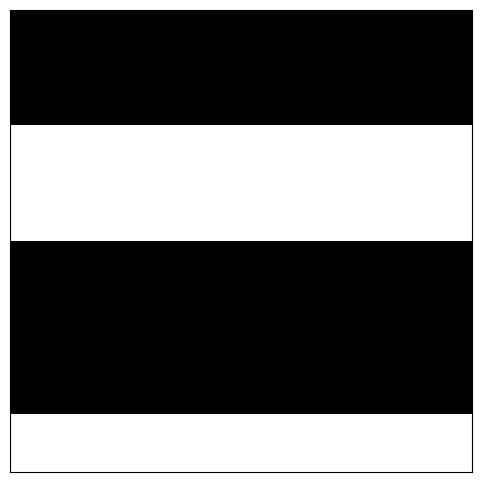

In [8]:
X = 255 * np.ones((100,100))
for r in range(10):
    X[r*10:r*10+5,:] = 0
X = X[12:99:12,12:99:12]

make_imshow(X)
plt.show() 

The original spatial image is composed of 100 values in 1 meter in the horizontal and vertical direction. The above code samples the image at
every 12th point (i.e., 8 Hz) in the horizontal and vertical direction to produce the below image.

The spatial image is distorted. The spatial frequency is 2 cycles per meter. Could we have predicted this
spatial frequency in advance?

Answer:
    
Sure, but this is a somewhat tricky case. The original spatial pattern changes at a rate of 10 cycles per
meter. To represent this spatial pattern the sample rate must be more than twice the fastest frequency
present in the original waveform. If we sample 8 times per meter, we are well below the 2 × 10 = 20
sampling rate required by Nyquist's Rule. This is a tricky case because the sampling rate is also lower
than the data rate (not just lower than twice the data rate). Half of the 8 Hz sampling rate is 4, so the 10
Hz spatial frequency will pivot across the 4 (10-4 = 6) to -2 (4--2 = 6). The 4 is equidistant from -2 and 10.
In effect, aliased frequencies <0 reflect back positive, pivoting over zero, so the aliased frequency is 2
Hz. One way to generalize that is to say that the aliased frequency is the absolute value of the sampling
frequency minus the data frequency - in this case, that is |8-10| = 2.

This generalization is worth remembering (same for time and space data): the aliased frequency is the
absolute value of the sampling frequency minus the data frequency

### <font color=red>DSP.02.T1.d) Nyquist Theorem - Spatial Data</font>

Look at one more example. Consider a case where we sample right at the frequency of the spatial pattern
(i.e., 10 samples per meter).

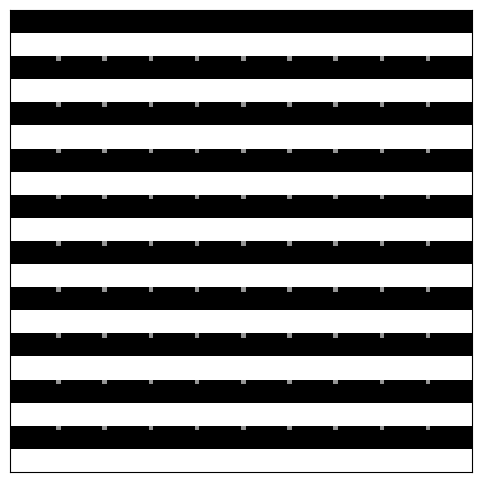

In [9]:
X = 255 * np.ones((100,100))
for r in range(10):
    X[r*10:r*10+5,:] = 0
X[10:99:10,10:99:10] = 127

make_imshow(X)
plt.show() 

Grey squares show where each data point is collected when we obtain 10 equally spaced samples in
the vertical direction.

What do you think the new image will look like?

Answer:
    
Look at the sampled image (using the sampled values to create a new image).

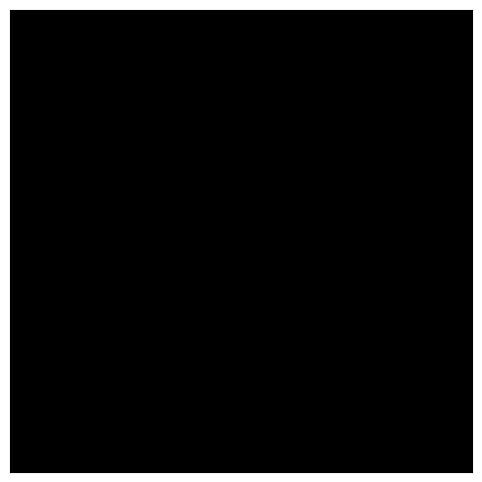

In [10]:
X = 255 * np.ones((100,100))
for r in range(10):
    X[r*10:r*10+5,:] = 0
X = X[10:99:10,10:99:10]

make_imshow(X)
plt.show()  

The new image (blank!) has a spatial frequency of 0 cycles per meter. The 10 cycle per meter signal has
been aliased down to 0 because we sampled the spatial field only at the black bars. This replicates, in the spatial domain, what we found in the Lesson 2 Basics until for the time domain: using the example of 60 Hz noise, we found that sampling at 60 Hz means that the original signal doesn't appear at all in the vector of samples, because we sampled the original signal at the same phase in each cycle.

In the present spatial case, we could've introduced a phase offset in our sampling, so that our samples occurred only at the white bars. If so, the plot of our samples would be all white. That would replicate, in the spatial domain, what we found in the Lesson 2 Basics until for the time domain when we added such a phase delay: using the example of 60 Hz noise, we found that sampling at 60 Hz means that the original signal doesn't appear at all in the vector of samples, because we sampled the original signal at the same phase in each cycle, but the values (still all the same) were nonzero.

## <font color=red>DSP.02.T2) DSP.02.T2) Nyquist Frequency - moving images</font>

### <font color=red>DSP.02.T2.a) Nyquist Theorem - TV images</font>

If you watch video (TV, phone, PC, movies), you might have noticed that sometimes the spokes on a wagon,
car, or bike wheel appear to change direction and appear to move in the wrong direction. This phenomenon is sometimes
referred to as the 'Wagon Wheel Illusion'.

Imagine you are a director filming an old-timey covered wagon traveling across an open field. Suppose
that you obtain an image 24 times/second. That's fast enough so that, when you show the film, viewers
don't see separate frames, and motion appears continuous. This puts your sampling rate at 24 Hz,
so the sampling period is 41.7 milliseconds (1000 millseconds/24 = 41.7 milliseconds).

This situation has Nyquist's Rule written all over it. Your sampling rate can be fast enough that the eye blurs the frames together, but that doesn't mean you're sampling fast enough to avoid aliasing.

Once we know how fast the wagon wheel is
rotating, we can easily determine whether we are sampling often enough to accurately represent the wagon
wheel's movement.

Suppose that the wagon wheel is rotating at 10 Hz, and our sampling rate (in movie-film frames per
second) is 24 Hz. Is this OK?

Answer:
    
Sure. The event (wagon wheel rotating) occurs at a rate of 10 Hz. To represent this continuous
event accurately, the sampling rate (in samples per second) must be more than twice the fastest
frequency present in the original event. Sampling at 24 Hz is above the 2 × 10 Hz = 20 Hz sampling rate
required by Nyquist's Rule.

Good so far, but what do you expect to happen if the wagon starts moving downhill, rotating at 16 Hz, and you continue
to sample at 24 Hz?

Answer:
    
Now there's a problem. The event occurs at a rate of 16 Hz. To represent this event adequately, the
sampling rate (in samples per second) must be more than twice the fastest frequency present in the
original event. Sampling at 24 Hz is below the needed 2 × 16 Hz = 32 Hz sampling rate.

What do you expect to happen when viewing the film of the wagon moving downhill, with the wagon
wheels rotating at 16 Hz?

Answer:
    
At 24 Hz sampling, the Nyquist frequency is 12 Hz. In this case, the 16 Hz activity will be aliased down to
8 Hz, because 8 Hz and 16 Hz are equidistant from the Nyquist frequency of 12 Hz. Thus, rather than
speeding up, as the wagon goes downhill the wagon wheels will appear to rotate more slowly!
What visual effect is expected if the wagon starts moving uphill, with the wagon wheels rotating a little
more slowly - at 13 Hz?

Answer:
    
Sampling at 24 Hz, the Nyquist Frequency is 12 Hz, a little too low for a 13 Hz phenomenon.

The 13 Hz activity will be aliased down to 11 Hz, because 11 Hz and 13 Hz are equidistant from the
Nyquist Frequency of 12 Hz.

Thus, after the wagon wheels appear to slow down going downhill, the wagon wheels will then seem to
speed up going uphill - even though the wagon is now going more slowly.

## <font color=red>DSP.02.T3) Multiplying Sine Waves</font>

### <font color=red>DSP.02.T3.a) Multiplying Sine Waves of Different Frequencies</font>

In the Lesson 2 Basics unit, we saw that multiplying sine waves is not the same as adding sine waves. Multiplying
two sine waves yields oscillatory activity at frequencies which are the sum and difference of the two
sine waves.

Let's look at this again.

Create a timeseries by multiplying a 10 Hz sine wave and 1000 Hz sine wave.

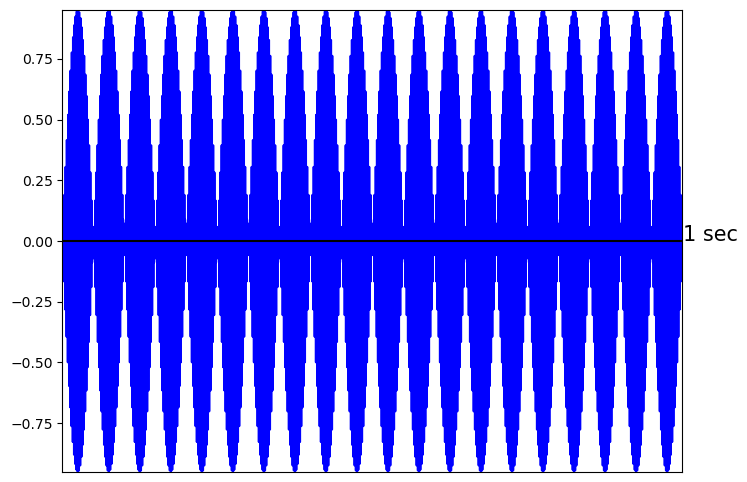

In [11]:
time = np.arange(0,1,1/2500)
freq1 = 10
freq2 = 1000
timeseries = np.sin(2*np.pi * freq1 * time) * np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

To correctly represent this timeseries, what is the lowest possible digitization rate?

Answer:
    
Apply Nyquist's Rule. Nyquist's Rule requires that we sample at at least twice the fastest frequency
present in the original waveform.

Remember, however, that multiplying sine waves is not the same as adding sine waves. Multiplying two
sine waves yields oscillatory activity at the sum and difference of the two sine waves. In the example
above, we multiplied 10 Hz and 1000 Hz sine waves. The sum of the two sine waves is 1010 Hz, and the
difference is 990 Hz. Because the highest frequency is 1010 Hz, we need to sample at 2020 Hz (at least - better go faster than that).

Let's sample at 2500 Hz, more than 2 x 1010, then take a look at the power spectrum. 

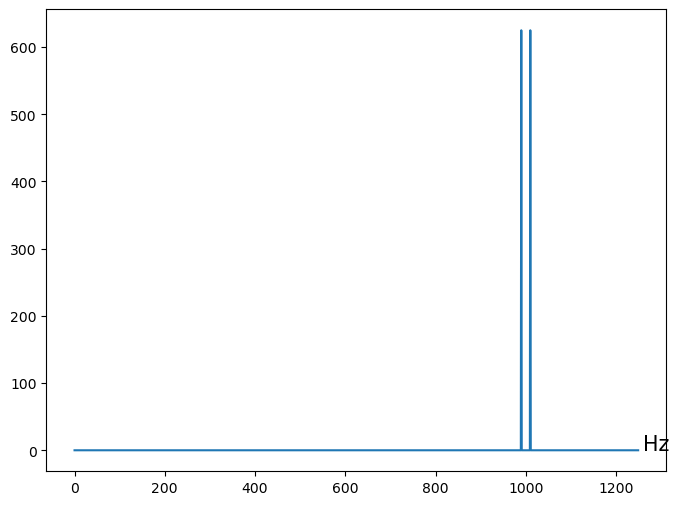

In [12]:
make_plot_freq_1(timeseries,2500)

# Adding text to the figure
plt.text(1260,0,'Hz',fontsize=15)
plt.show()

Looks good: we get peaks at 990 Hz and 1010 Hz.

### <font color=red>DSP.02.T3.b) A Little More on Multiplying Sine Waves of Different Frequencies</font>

Multiply a 2 Hz sine wave and a 3 Hz sine wave.

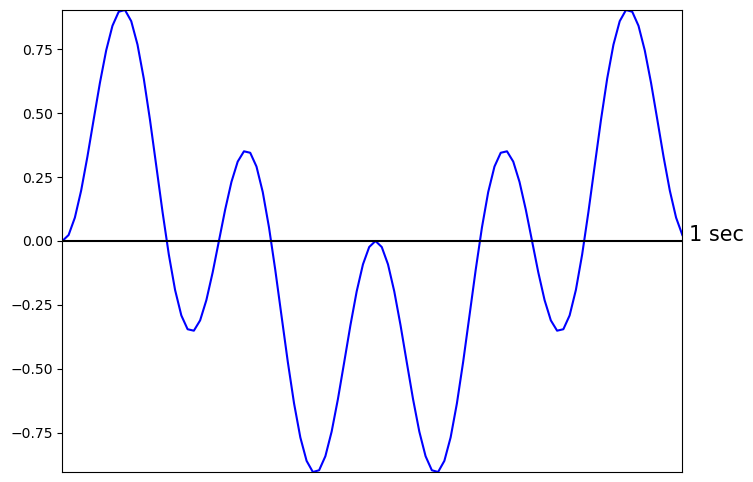

In [13]:
time = np.arange(0,1,0.01)
timeseries = np.sin(2*np.pi * 2 * time) * np.sin(2*np.pi * 3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Just what we should expect. If you look closely, you can see 5 Hz and 1 Hz activity in the multiplied
timeseries (remember the sum and difference rule): there is slow activity, completing 1 cycle in 1 second (1 Hz), and there is fast activity, completing 5 cycles in 1 second (5 Hz). These two (new) signals are summed in
the plot. Note that sinusoidal activity goes above and below the x axis.

Run the code below to calculate the mean value of activity across the 1 second interval. There are lots of
ways to obtain the mean. If you know some calculus, one way is to integrate the function from 0 to 1
second and then divide by the duration of the sample.

In [14]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * 2 * x) * np.sin(2*np.pi * 3 * x)

round(quad(integrand, 0, 1)[0] / 0.5)

0

The mean is 0. This is a property of multiplying sine waves of different frequencies when all constituent sine waves complete an integer number of cycles - the mean value is
always zero. In this simple case, you can also estimate the mean value just by eyeballing the plot above
and seeing that there is as much activity above the line as below it.

Overlay the plot of 2 Hz and 3 Hz waves to start to see why this averaging to 0 happens.

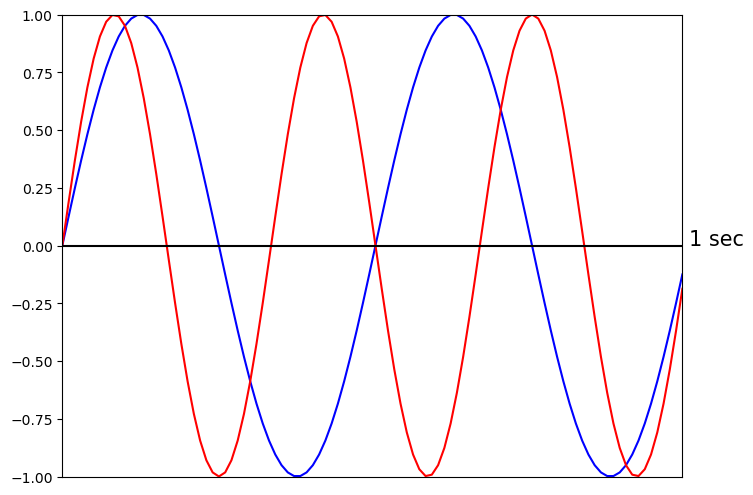

In [15]:
time = np.arange(0,1,0.01)
timeseries1 = np.sin(2*np.pi * 2 * time) 
timeseries2 = np.sin(2*np.pi * 3 * time)

# Plotting time vs amplitude using plot function 
make_plot_2(time,timeseries1,'blue', time, timeseries2,'red')
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

At the start, the two waveforms are heading in the same direction, and their product is positive.
At later points, one waveform is positive and the other is negative, and thus the product is negative.
And sometimes one waveform is at zero, while the other waveform is positive or negative, forcing a
zero value. But, on its own, the 2 Hz waveform averages to 0, and, on its own, the 3 Hz activity averages to
0.

Compare the two original waveforms with their product to see what is happening.

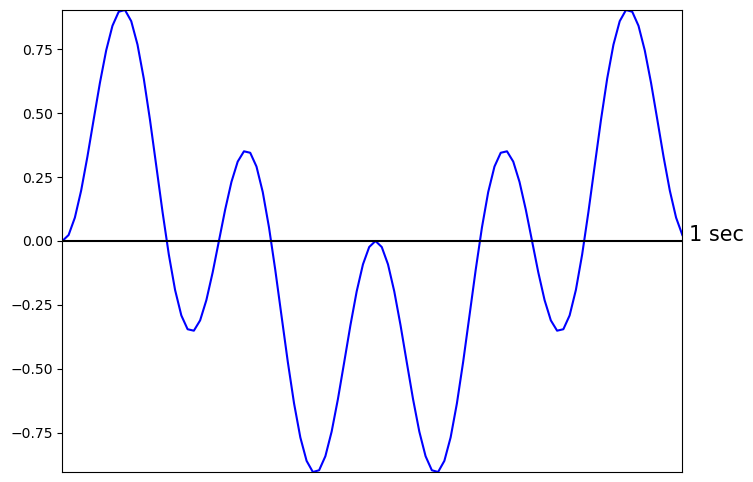

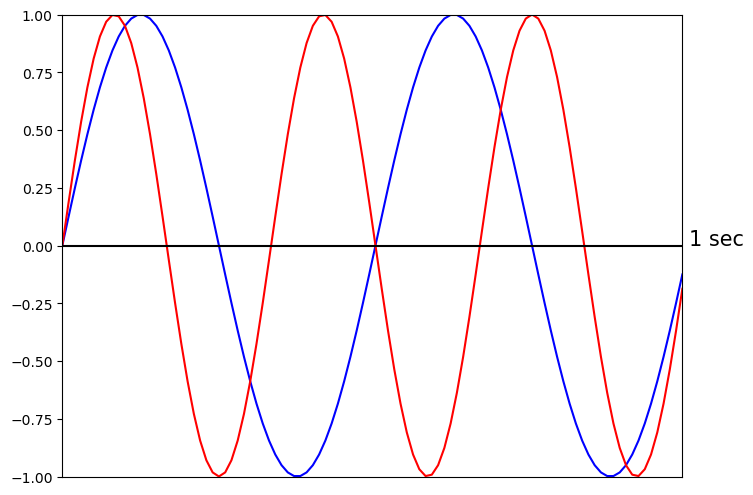

In [16]:
timeseries = np.sin(2*np.pi * 2 * time) * np.sin(2*np.pi * 3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

make_plot_2(time,timeseries1,'blue', time, timeseries2,'red')
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

Because these are sine waves of different frequencies, the area below the x axis is equal to the area
above the x axis, and the mean is always zero.

### <font color=red>DSP.02.T3.c) Multiplying Sine Waves of the Same Frequency</font>

Things can work out differently when we multiply sine waves of the same frequency, depending on
their phase relationship. Let's multiply two 3 Hz sine waves that are in phase.

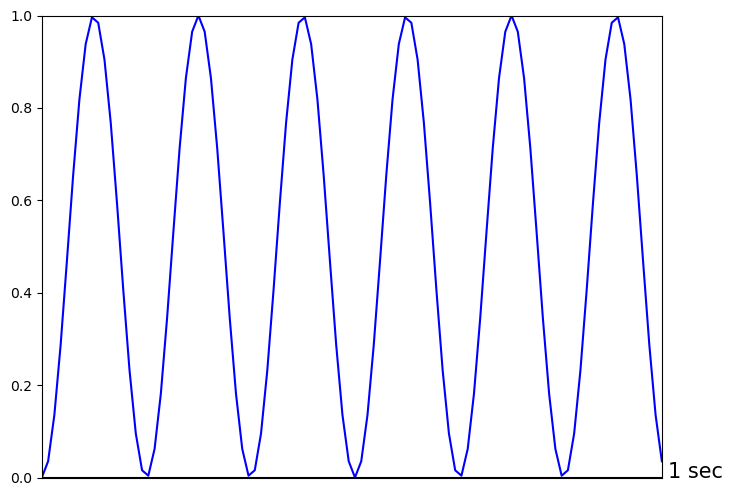

In [17]:
time = np.arange(0,1,0.01)
timeseries = np.sin(2*np.pi * 3 * time) * np.sin(2*np.pi * 3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Is this right? Why is all the activity above the x axis?

Answer:
    
As above, overlay the plot of the two 3 Hz sine waves.

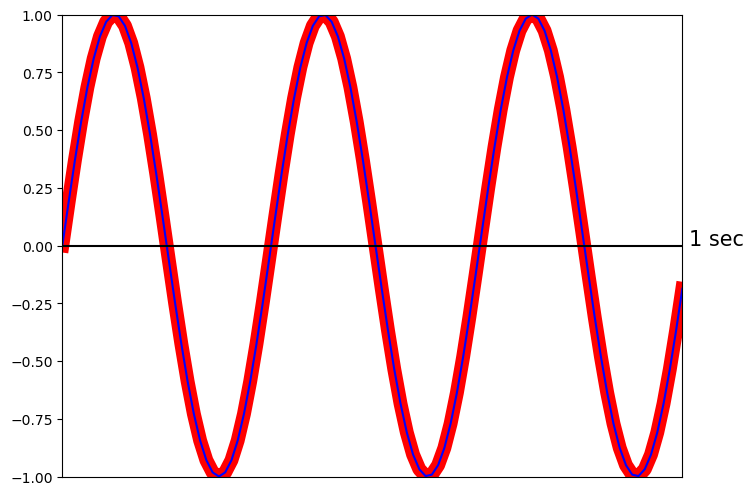

In [18]:
time = np.arange(0,1,0.01)
timeseries1 = np.sin(2*np.pi *3 * time) 
timeseries2 = np.sin(2*np.pi * 3 * time)

# Plotting time vs amplitude using plot function from pyplot
plt.plot(time, timeseries2, color = "red", linewidth = 10)
plt.plot(time, timeseries1,color = "b")
plt.margins(x=0, y=0)
plt.axhline(y=0, color='k')
plt.tick_params(labelbottom = False, bottom = False)

# Adding text to the figure
plt.text(1,0,'1 sec',fontsize=15)

# Finally displaying the plot
plt.show()

In the graph above, one of the 3 Hz sine waves is shown with a thicker line to show that the 3 Hz sine
waves overlap all the way. During the entire interval, the two waveforms are always headed in the same
direction.

-When the waveforms are above the x axis, their values are both positive, and thus the product is
positive.

-When the waveforms are below the x axis, their values are both negative, and thus the product is again
positive.

So.....

WHEN YOU MULTIPLY TWO WAVEFORMS OF THE SAME FREQUENCY AND PHASE, THE PRODUCT WILL
ALWAYS BE POSITIVE.

In later Lessons, we will see how we can take advantage of this fact to identify the frequencies (and their respective phases) of a timeseries.

Look again

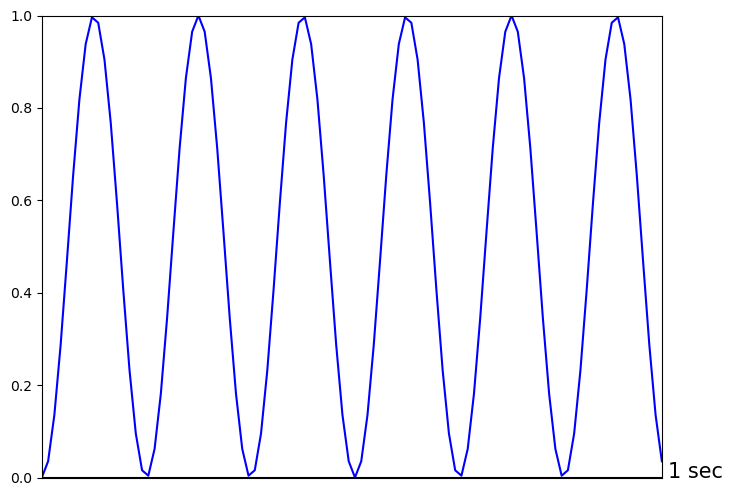

In [19]:
time = np.arange(0,1,0.01)
timeseries = np.sin(2*np.pi * 3 * time) * np.sin(2*np.pi * 3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

In addition, when you multiply two waveforms of the same frequency and phase the mean is non-zero.


Specifically, when you multiply two sine waves of the same frequency and phase (which may or may not have the same amplitude), the resulting wave's
average value is the product of the two individual amplitudes. 

Take a look at two sine waves that have the same frequency but different amplitudes.

Multiply a 3 Hz sine wave with an amplitude of 5 and another 3 Hz sine wave with an amplitude of 1.

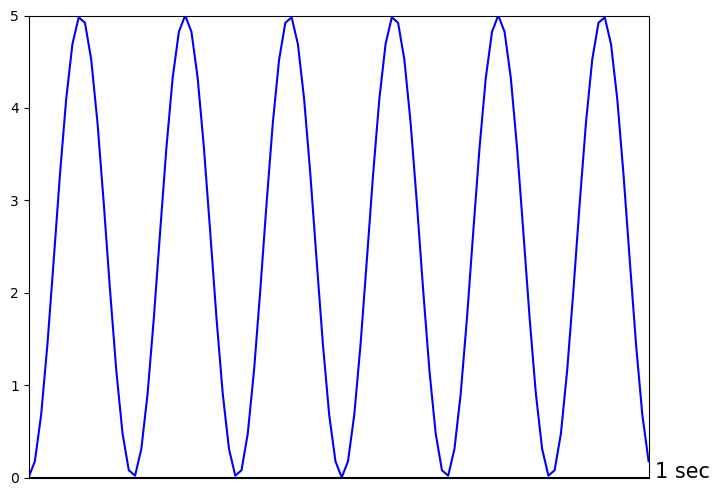

In [20]:
time = np.arange(0,1,0.01)
timeseries = 5 * np.sin(2*np.pi * 3 * time) * np.sin(2*np.pi * 3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Because the sine waves are the same frequency and phase, the mean is non-zero.

Here is another example.

Multiply a 3 Hz sine wave with an amplitude of 5 and another 3 Hz sine wave with an amplitude of 10.

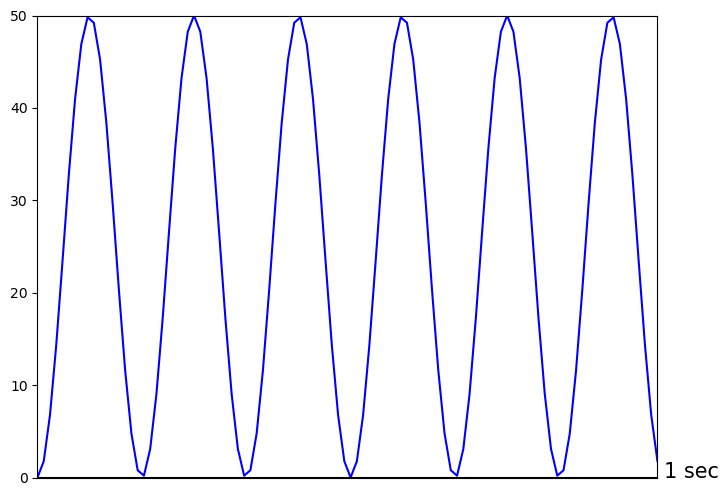

In [21]:
time = np.arange(0,1,0.01)
timeseries = 5 * np.sin(2*np.pi * 3 * time) * 10 * np.sin(2*np.pi * 3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Because the sine waves are the same frequency and phase, the mean is non-zero.

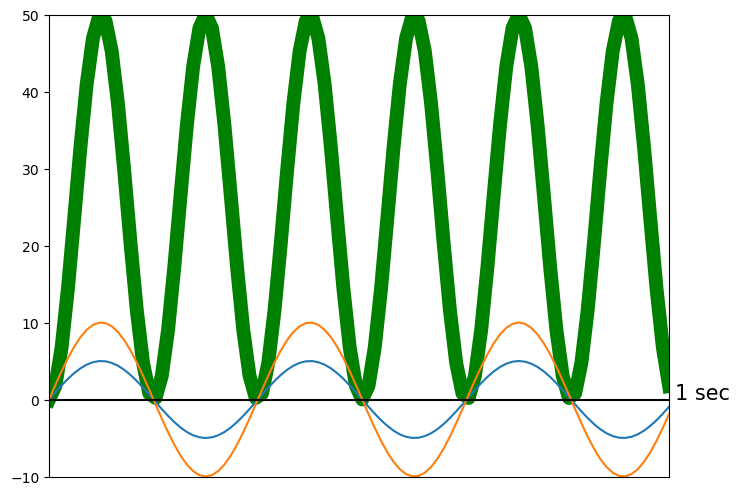

In [22]:
time = np.arange(0,1,0.01)
timeseries1 = 5 * np.sin(2*np.pi * 3 * time) 
timeseries2 = 10 * np.sin(2*np.pi * 3 * time)
timeseries = timeseries1 * timeseries2

# Plotting time vs amplitude using plot function from pyplot
plt.plot(time, timeseries, color = "green", linewidth = 10)
plt.plot(time, timeseries1)
plt.plot(time, timeseries2)
plt.margins(x=0, y=0)
plt.axhline(y=0, color='k')
plt.tick_params(labelbottom = False, bottom = False)

# Adding text to the figure
plt.text(1,0,'1 sec',fontsize=15)

# Finally displaying the plot
plt.show()

The original waves are shown in blue and orange, and the product of the two sine waves is shown in green. To obtain the green waveform, we multiply the
two sine waves, sample-by-sample, across time. For example, at $π$/2 we multiply the maximum of one
sine wave with the maximum of the other (5 × 10 = 50). This gives the maximum peak in the multiplied
waveform. All other multiplied values range between a low of 0 and a high of 50.

Without having to directly calculate the mean, at this point you should be able to derive the mean
amplitude just by looking at the formula.

## <font color=red>DSP.02.T4) More About Complex Numbers</font>

### <font color=red>DSP.02.T4.a) Plotting Complex Numbers</font>

We talked about complex numbers in Lesson 1. Let's do some more with them. We can represent the point (a,b) as a vector in 2D space.
Here is a plot of the xy point (10, 7).

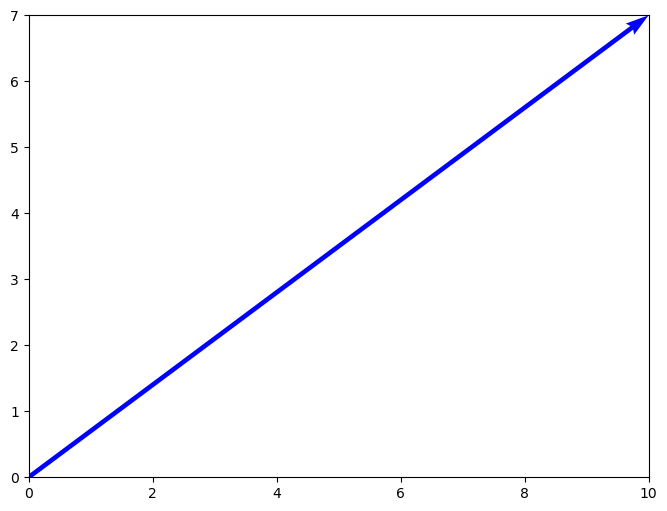

In [23]:
plt.quiver(0, 0, 10, 7, angles='xy', scale_units='xy', scale=1, color = 'b')
plt.xlim(0, 10)
plt.ylim(0, 7)
plt.show()

In a similar way, we can represent complex numbers as a point on a plane (called the Argand diagram
or the complex plane). As you may recall, a complex number has a real part and an imaginary part.

Simply plot the real part of the complex number on the x axis and the imaginary part on the y axis, with
the imaginary part often written with a lower-case $i$ (or in some fields and often in the coursewave code a $j$) after it.

Here is the plot of the complex number 10 + 7$i$

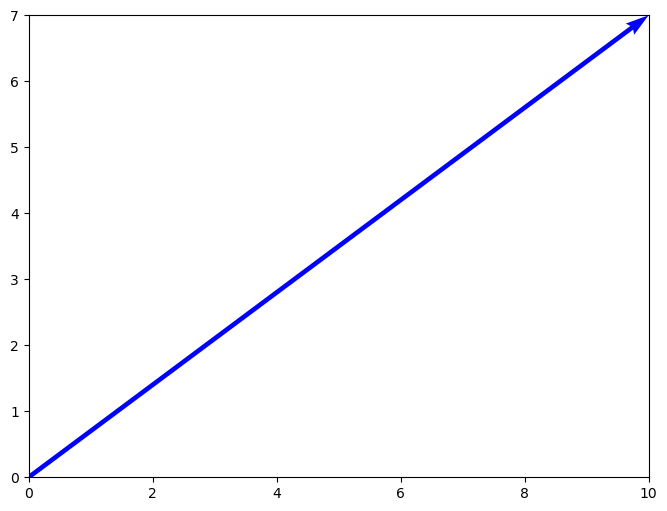

In [24]:
plt.quiver(0, 0, 10, 7, angles='xy', scale_units='xy', scale=1, color = 'b')
plt.xlim(0, 10)
plt.ylim(0, 7)
plt.show()

Compare that to the plot of the complex number 10 - 7$i$ (in other words, compare adding the 7$i$ with subtracting it).

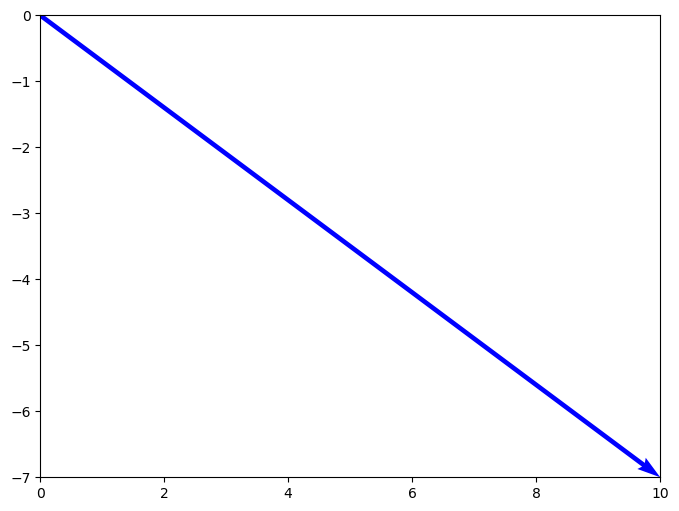

In [25]:
plt.quiver(0, 0, 10, -7, angles='xy', scale_units='xy', scale=1, color = 'b')
plt.xlim(0, 10)
plt.ylim(-7,0)
plt.show()

That is all there is to plotting complex numbers.

### <font color=red>DSP.02.T4.b) The Modulus</font>

Sometimes we want to work with a combination of the amplitude and phase of a sine wave. Complex
numbers are a useful way to represent amplitude and phase. If you haven't done much with complex
numbers, you might think that 'The Modulus' is a California indie band. If you've worked with complex
numbers, then you probably know that the modulus is the magnitude of a complex number (the magnitude
of a real number is the absolute value of that number). In Python, the 'abs' function
calculates the magnitude of real and complex numbers.

Take the complex number z = a+$i$ b. The magnitude of z is given by |z| = a+$i$ b and is computed using the
Python 'abs' command. (Remember, in the text we will use '$i$' to represent the imaginary number and in the code sometimes '$j$')

In [26]:
z = 3 + 4j;
abs(z)

5.0

If this method doesn't suit your fancy, you can instead calculate the modulus using the Pythagorean
theorem. That's because the modulus of a complex number is simply the length of a vector plotted on
a perpendicular frame with real (x axis) and imaginary (y axis) axes. The modulus is essentially the
hypotenuse of the resulting triangle. Here is a plot of z[x] = 3+ $i$4.

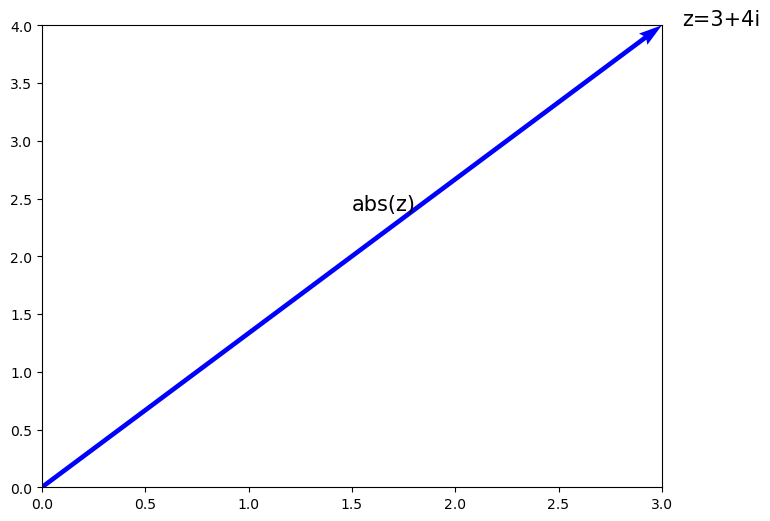

In [27]:
plt.quiver(0, 0, 3, 4, angles='xy', scale_units='xy', scale=1, color = 'b')
plt.xlim(0, 3)
plt.ylim(0, 4)
plt.text(3.1,4,'z=3+4i',fontsize=15)
plt.text(1.5,2.4,'abs(z)',fontsize=15)
plt.show()

Use the Pythagorean theorem to calculate the modulus. (Python, like FORTRAN, uses '**' to indicate at the next value is an exponent.)

In [28]:
length = math.sqrt(3 ** 2 + 4 ** 2)
length

5.0

Using matrix notation, this is the same as calculating the dot product (where X is the vector
(3,4)).

In [29]:
length = np.sqrt(np.dot([3,4],[3,4]))
length

5.0

Compare using the 'abs' function.

In [30]:
z = 3 + 4j;
abs(z)

5.0

It checks out. That's all there is to finding the modulus.

### <font color=red>DSP.02.T4.c) The Phase</font>

In addition to calculating the magnitude of a complex number, we often want to calculate the angle
that the complex vector makes with respect to the positive real axis. This angle value is called the
phase and is calculated in Python with the 'Arc' function. (We used the term 'phase' earlier. The
use here is closely related to that. We will see how in a little while.)

Take the following complex number z = 2+ $i$2. 

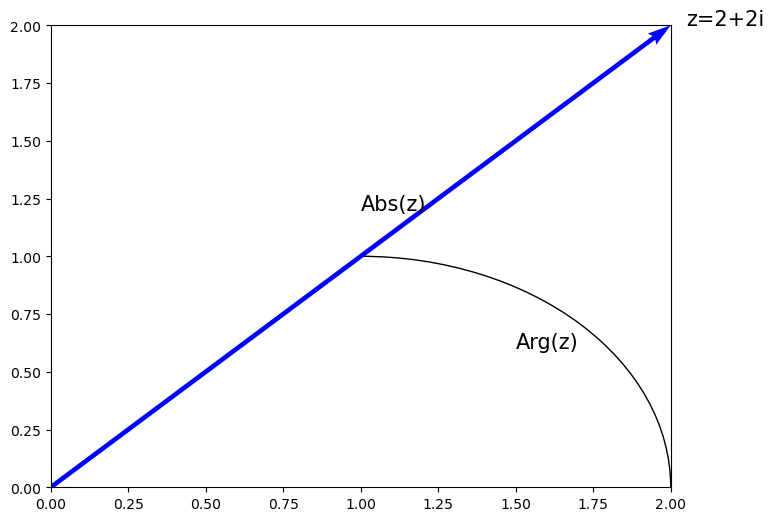

In [31]:
from matplotlib.patches import Arc

fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylim(0, 2)
ax.set_xlim(0, 2)
a = Arc((1, 0),width=2,height=2,angle=0,theta1=0,theta2=90, linewidth=1, color='k')
ax.add_patch(a)

plt.quiver(0, 0, 2, 2, angles='xy', scale_units='xy', scale=1, color = 'b')
plt.text(2.05,2,'z=2+2i',fontsize=15)
plt.text(1,1.2,'Abs(z)',fontsize=15)
plt.text(1.5,0.6,'Arg(z)',fontsize=15)
plt.show()

The phase is the angle that the complex vector makes with respect to the positive real axis.

In [32]:
z = 2 + 2j;
cmath.phase(z)

0.7853981633974483

The output of the 'phase' command tells us that the phase of this complex number is π/4 radians.

If needed, convert to degrees.

In [33]:
round(cmath.phase(z) * 180 / np.pi)

45

$π$/4 radians makes a 45 degree angle. (If you remember basic trigonometry, you will see that what the
'Arg' command does is compute the arctangent of the imaginary part of the complex number divided
by the real part.)

Plot a different complex number.

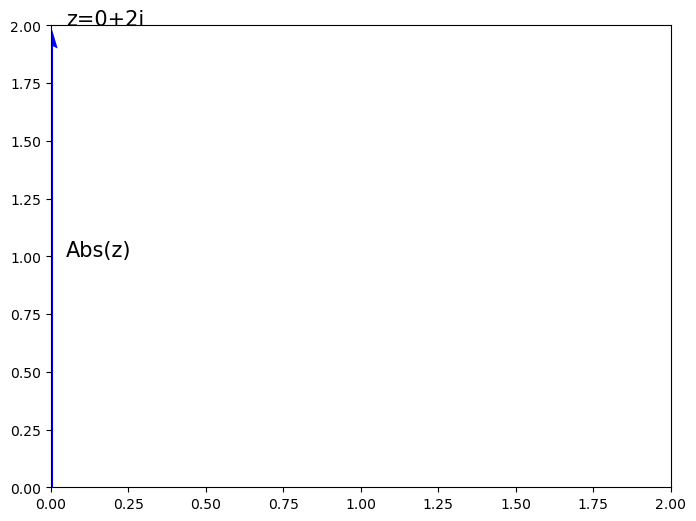

In [34]:
plt.quiver(0, 0, 0, 2, angles='xy', scale_units='xy', scale=1, color = 'b')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.text(0.05,2,'z=0+2i',fontsize=15)
plt.text(0.05,1,'Abs(z)',fontsize=15)
plt.show()

The vector described by this complex number projects completely onto the imaginary y axis. The 'Arg'
command calculates the angle of that vector with respect to the x axis. Because the vector lies perpendicular
to the real axis, the phase value should be 90° .

In [35]:
z = 0 + 2j;
cmath.phase(z)

1.5707963267948966

The output of the 'phase' command tells us that the phase of this complex number is π/2 radians.

If needed, convert to degrees.

In [36]:
round(cmath.phase(z) * 180 / np.pi)

90

### <font color=red>DSP.02.T4.d) Taking the real or the imaginary part of a complex number</font>

In some instances you might want just the real or the imaginary part of a complex number. If you look
closely, you will see this was done when creating the figures above. Get the real part of a complex
number this way:

In [37]:
z = 3 + 4j;
print(z.real)

3.0


Get the imaginary part of a complex number this way:

In [38]:
print(z.imag)

4.0


### <font color=red>DSP.02.T4.e) A Trigonometric Identity</font>

Finally, here is a trigonometric fact we will need to remember in later chapters:
$sin^{2} θ + cos^{2} θ = 1$

Check out the plot of $sin^{2} θ + cos^{2} θ$.

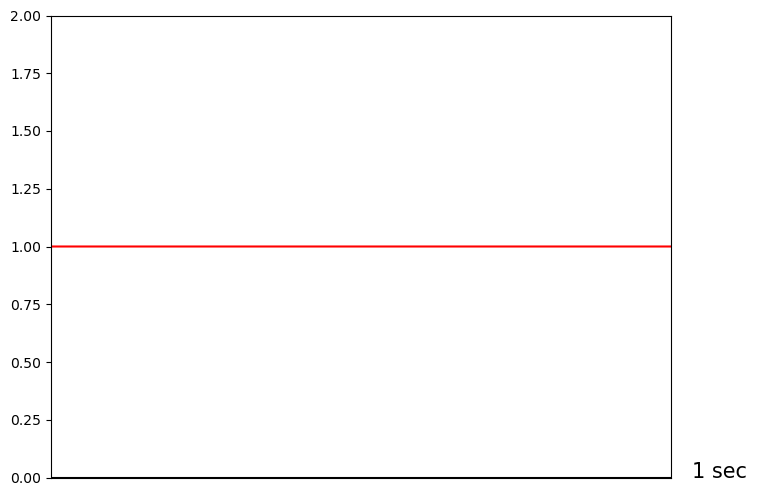

In [39]:
time = np.arange(0,2*np.pi,  2*np.pi/4096)

# Finding amplitude at each time
timeseries = (np.sin(10 * time) ** 2) + (np.cos(10 * time) ** 2)

make_plot_1(time,timeseries,'red')
plt.text(6.5,0,'1 sec',fontsize=15)
plt.ylim(0, 2)
plt.show()

The above plot shows that for all values of x (time), $sin^{2} θ + cos^{2} θ = 1$ .

